In [3]:
!pwd

import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import xgboost as xgb

import sys 
sys.path.append('../')
import src.model.feature_cleaning as feature_cleaning

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#sklearn models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#sklearn other
#import graphviz 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, log_loss, accuracy_score, roc_auc_score, auc, roc_curve
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence



/Users/fabio/galv/capstone/notebooks


In [4]:
df, fieldofdegree_df, SOCP_labels, schl_labels, major_majors, NAICSP_labels_df, MAJ_NAICSP_labels_df = feature_cleaning.load_dfs()

youngemp_df = feature_cleaning.clean_that_target(df, SOCP_labels)
youngemp_df = feature_cleaning.single_occ_target_specific(youngemp_df)
freewill_df = feature_cleaning.create_freewill_df(youngemp_df, fieldofdegree_df, schl_labels, major_majors)

../src/model/feature_cleaning.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SOCPdf = df.dropna(axis='index', subset=['SOCP'])[df.SOCP != '999920']


Number of employed people: 218454
Percent employed people: 0.5785711448056677
Number of young employed people: 77406
Percent young employed people(out of all PUMS): 0.20500827650135733
Number of emp cats: 23
Number of degree fields present (max 173): 173


../src/model/feature_cleaning.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
../src/model/feature_cleaning.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
../src/model/fea

before dummies:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77406 entries, 0 to 77405
Data columns (total 33 columns):
SERIALNO            77406 non-null int64
SOCP                77406 non-null object
MAJ_SOCP            77406 non-null object
MAJ_SOCP_labels     77406 non-null object
SOCP_computer       77406 non-null int64
FOD1P               77406 non-null object
FOD2P               77406 non-null object
FOD1P_labels        77406 non-null object
FOD1P_MAJ_labels    77406 non-null object
FOD2P_labels        77406 non-null object
SCHL                77406 non-null object
SCHL_labels         77406 non-null object
PUMA                77406 non-null int64
COW                 77406 non-null float64
ENG                 77406 non-null float64
JWTR                77406 non-null float64
JWMNP               77406 non-null float64
MARHT               77406 non-null float64
WKHP                77406 non-null float64
WKW                 77406 non-null float64
MSP                 77406 non-n

In [12]:
# split the data, choosing only edu cols
X = freewill_df.drop(columns=['SERIALNO', 'SOCP','MAJ_SOCP','MAJ_SOCP_labels','SOCP_computer', 
                'FOD1P_labels','FOD1P_MAJ_labels','FOD2P_labels','SCHL','SCHL_labels', 'COW_labels',
                        'ENG_labels', 'JWTR_labels', 'MARHT_labels', 'WKW_labels', 'MSP_labels', 'RELP_labels', 'FMILSP_labels'])
y = freewill_df.loc[:,'SOCP_computer']

y.head(100)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    1
73    0
74    0
75    0
76    0
77    0
78    0
79    1
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    1
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
Name: SOCP_computer, dtype: int64

In [13]:
X.head(100)

,PUMA,JWMNP,WKHP,WKW_ord,COW__Employee(for-profit),COW__Employee(non-profit),"COW__Family business, unpaid",COW__Federal gov employee,COW__Local gov employee,COW__Self-employed(inc),COW__Self-employed(not inc),COW__State govemployee,ENG__Native,ENG__Not at all,ENG__Not well,ENG__Very well,ENG__Well,FMILSP__No,FMILSP__Yes,"FOD1P_MAJ__Agriculture, agriculture operations, and related sciences",FOD1P_MAJ__Architecture and related services,"FOD1P_MAJ__Area, ethnic, cultural, gender, and group studies",FOD1P_MAJ__Biological and biomedical sciences,"FOD1P_MAJ__Business, management, marketing, and related support services","FOD1P_MAJ__Communication, journalism, and related programs",FOD1P_MAJ__Communications technologies/technicians and support services,FOD1P_MAJ__Computer and information sciences and support services,FOD1P_MAJ__Construction trades,FOD1P_MAJ__Education,FOD1P_MAJ__Engineering,FOD1P_MAJ__Engineering technologies and engineering-related fields,FOD1P_MAJ__English language and literature/letters,FOD1P_MAJ__Family and consumer sciences/human sciences,"FOD1P_MAJ__Foreign languages, literatures, and linguistics",FOD1P_MAJ__Health professions and related programs,FOD1P_MAJ__History,"FOD1P_MAJ__Homeland security, law enforcement, firefighting and related protective services",FOD1P_MAJ__Legal professions and studies,"FOD1P_MAJ__Liberal arts and sciences, general studies and humanities",FOD1P_MAJ__Library science,FOD1P_MAJ__Mathematics and statistics,FOD1P_MAJ__Mechanic and repair technologies/technicians,"FOD1P_MAJ__Military science, leadership and operational art",FOD1P_MAJ__Multi/interdisciplinary studies,FOD1P_MAJ__Natural resources and conservation,FOD1P_MAJ__No major,"FOD1P_MAJ__Parks, recreation, leisure, and fitness studies",FOD1P_MAJ__Personal and culinary services,FOD1P_MAJ__Philosophy and religious studies,FOD1P_MAJ__Physical sciences,FOD1P_MAJ__Psychology,FOD1P_MAJ__Public administration and social service professions,FOD1P_MAJ__Science technologies/technicians,FOD1P_MAJ__Social sciences,FOD1P_MAJ__Theology and religious vocations,FOD1P_MAJ__Transportation and materials moving,FOD1P_MAJ__Visual and performing arts,FOD1P__Accounting,FOD1P__Actuarial Science,FOD1P__Advertising And Public Relations,FOD1P__Aerospace Engineering,FOD1P__Agricultural Economics,FOD1P__Agriculture Production And Management,FOD1P__Animal Sciences,FOD1P__Anthropology And Archeology,FOD1P__Applied Mathematics,FOD1P__Architectural Engineering,FOD1P__Architecture,FOD1P__Area Ethnic And Civilization Studies,FOD1P__Art And Music Education,FOD1P__Art History And Criticism,FOD1P__Astronomy And Astrophysics,FOD1P__Atmospheric Sciences And Meteorology,FOD1P__Biochemical Sciences,FOD1P__Biological Engineering,FOD1P__Biology,FOD1P__Biomedical Engineering,FOD1P__Botany,FOD1P__Business Economics,FOD1P__Business Management And Administration,FOD1P__Chemical Engineering,FOD1P__Chemistry,FOD1P__Civil Engineering,FOD1P__Clinical Psychology,FOD1P__Cognitive Science And Biopsychology,FOD1P__Commercial Art And Graphic Design,FOD1P__Communication Disorders Sciences And Services,FOD1P__Communication Technologies,FOD1P__Communications,FOD1P__Community And Public Health,FOD1P__Composition And Rhetoric,FOD1P__Computer Administration Management And Security,FOD1P__Computer And Information Systems,FOD1P__Computer Engineering,FOD1P__Computer Networking And Telecommunications,FOD1P__Computer Programming And Data Processing,FOD1P__Computer Science,FOD1P__Construction Services,FOD1P__Cosmetology Services And Culinary Arts,FOD1P__Counseling Psychology,FOD1P__Court Reporting,FOD1P__Criminal Justice And Fire Protection,FOD1P__Criminology,FOD1P__Drama And Theater Arts,FOD1P__Early Childhood Education,FOD1P__Ecology,FOD1P__Economics,FOD1P__Educational Administration And Supervision,FOD1P__Educational Psychology,FOD1P__Electrical Engineering,FOD1P__Electrical Engineering Technology,"FOD1P__Electrical, Mechanical, And Precision Technologies And Production",FOD1P__Elementary Educatio

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [21]:

# model pipelines
#-----------------------------------
#-------------linear
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42))])

pipe_lr_l2 = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42))])

pipe_sgd = Pipeline([('scl', StandardScaler()),
            ('clf', SGDClassifier(random_state=42))])


#-------------trees
pipe_dt = Pipeline([('clf', DecisionTreeClassifier(random_state=42))])

pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])

pipe_rf_scl = Pipeline([('scl', StandardScaler()),
            ('clf', RandomForestClassifier(random_state=42))])

pipe_gb = Pipeline([('clf', GradientBoostingClassifier(random_state=42))])


#-------------SVM
pipe_svm = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=42))])


#-------------KNN
pipe_knn = Pipeline([('clf', KNeighborsClassifier())])

pipe_knn_scl = Pipeline([('scl', StandardScaler()),
            ('clf', KNeighborsClassifier())])

#-----------------------------------

#-------------XGB
pipe_xgb = Pipeline([('clf', xgb.XGBClassifier())])
#-----------------------------------


# grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]
max_depth = [10,100,1000,10000]
max_depth2 = [10,100,1000]
alpha_range = [.1, .001, .00001, .000001]
gamma_range = [.1, 1, 10]

#-------------linear
grid_params_lr = [{'clf__penalty': ['l1'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear', ],  #,'saga'
        #'clf__multi_class': ['ovr', 'multinomial', 'auto'],
        'clf__class_weight': [None, 'balanced']}] 

grid_params_lr_l2 = [{'clf__penalty': ['l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['newton-cg', 'lbfgs', 'liblinear'],  #, 'sag'
        #'clf__multi_class': ['ovr', 'multinomial', 'auto'],
        'clf__class_weight': [None, 'balanced']}]

grid_params_sgd = [{'clf__loss': ['hinge', 'log', 'perceptron'],
        'clf__alpha': alpha_range,
        'clf__penalty': ['l1', 'l2', 'elasticnet'],
        'clf__class_weight': [None, 'balanced']}] 

#-------------trees
grid_params_dt = [{'clf__criterion': ['gini', 'entropy'],
        'clf__min_samples_leaf': param_range,
        'clf__max_depth': max_depth,
        'clf__min_samples_split': param_range[1:],
        'clf__class_weight': [None, 'balanced']}]

grid_params_rf = [{}]

# 'clf__criterion': ['entropy'],
#     'clf__min_samples_leaf': [1],
#     'clf__max_depth': [1000],
#     'clf__min_samples_split': [10],
#     'clf__class_weight': [None],
#     'clf__n_estimators':[10]

grid_params_gb = [{}]

# 'clf__loss': ['deviance', 'exponential'],
#         'clf__learning_rate': alpha_range,
#         'clf__n_estimators': max_depth2,
#         'clf__subsample': param_range_fl

#-------------SVM
grid_params_svm = [{'clf__kernel': ['linear', 'rbf', 'poly'],
        'clf__degree': param_range[1:],
        'clf__gamma': gamma_range,
        'clf__C': gamma_range,
        'clf__class_weight': [None, 'balanced']}]

#-------------KNN
grid_params_knn = [{'clf__n_neighbors': param_range}]

#-------------XGB

grid_params_xgb = [{}]

# #'clf__n_estimators': max_depth2,
#                    'clf__max_depth': max_depth,
#                    'clf__learning_rate':gamma_range

#--------------------------------------------------------------

# Construct grid searches
jobs = -1
verbose = 2

#-------------linear
gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose) 

gs_lr_l2 = GridSearchCV(estimator=pipe_lr_l2,
            param_grid=grid_params_lr_l2,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose)

gs_sgd = GridSearchCV(estimator=pipe_sgd,
            param_grid=grid_params_sgd,
            scoring='f1_micro',
            cv=10,
            verbose=verbose)


#-------------trees    
gs_dt = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_dt,
            scoring='f1_micro',
            cv=10, 
            n_jobs=jobs,
            verbose=verbose)

gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='f1_micro',
            cv=10, 
            n_jobs=jobs,
            verbose=verbose)

gs_rf_scl = GridSearchCV(estimator=pipe_rf_scl,
            param_grid=grid_params_rf,
            scoring='f1_micro',
            cv=10, 
            n_jobs=jobs,
            verbose=verbose)

gs_gb = GridSearchCV(estimator=pipe_gb,
            param_grid=grid_params_gb,
            scoring='f1_micro',
            cv=10, 
            verbose=verbose)

#-------------SVM

gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose)

#-------------KNN
gs_knn = GridSearchCV(estimator=pipe_knn,
            param_grid=grid_params_knn,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose)

gs_knn_scl = GridSearchCV(estimator=pipe_knn_scl,
            param_grid=grid_params_knn,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose)

#-------------XGB
gs_xgb = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='f1_micro',
            cv=10, 
            verbose=verbose)

#---------------------------------------------------------------------

# List of pipelines for ease of iteration
grids = [ gs_rf]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0:'rf'}

# Fit the grid search objects
print('Performing model optimizations...')
best_f1_micro = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs = gs.fit(X_train, y_train)

    # Best params
    print('Best params: %s' % gs.best_params_)

    # Best training data f1
    print('Best training f1: %.3f' % gs.best_score_)

    # Predict on test data with best params
    y_pred = gs.predict(X_test)

    #accuracy
    print('test accuracy {}:'.format( accuracy_score(y_test, y_pred)))

    # Test data accuracy of model with best params
    print('Test set f1 score for best params: %.3f ' % f1_score(y_test, y_pred))

    # Track best (highest test f1) model
    if f1_score(y_test, y_pred) > best_f1_micro:
        best_f1_micro = f1_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set f1: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
dump_file = 'freewill_untuned_gradboost_occ_15.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

Performing model optimizations...

Estimator: rf
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ................................................. , total=   6.3s
[CV] ................................................. , total=   6.3s
[CV] .................................

[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    8.3s remaining:    8.3s


[CV] ................................................. , total=   7.2s
[CV] ................................................. , total=   7.4s
[CV] ................................................. , total=   7.4s
[CV] ................................................. , total=   7.5s
[CV] ................................................. , total=   7.5s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.8s finished


Best params: {}
Best training f1: 0.969
test accuracy 0.9688226681595039:
Test set f1 score for best params: 0.359 

Classifier with best test set f1: rf

Saved rf grid search pipeline to file: freewill_untuned_gradboost_occ_15.pkl


In [18]:
importances = gs.best_estimator_.named_steps["clf"].feature_importances_ 
indices = np.argsort(importances)[::-1][0:9]

Text(0.5,1,'Feature Importances on CS Occupation Using Random Forest')

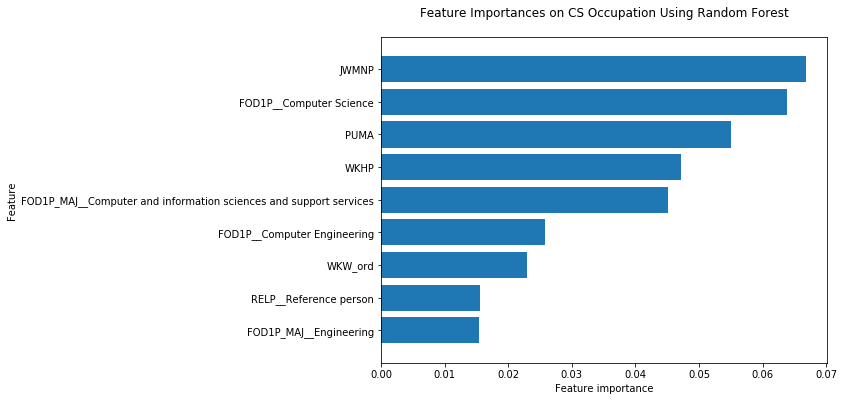

In [19]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 9
    plt.barh(range(n_features), importances[indices], align='center')
    plt.yticks(np.arange(n_features), [X.columns[i] for i in indices])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gs.best_estimator_.named_steps["clf"])
plt.gca().invert_yaxis()
plt.title("Feature Importances on CS Occupation Using Random Forest", pad=20)

In [25]:
#auc
y_pred_proba = gs.predict_proba(X_test)
y_pred_proba

array([[1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [26]:
gs.classes_

array([0, 1])

In [34]:
y_pred_proba[:,1]

array([0. , 0. , 0.1, ..., 0. , 0. , 0. ])

In [35]:
print('test auc {}:'.format( roc_auc_score(y_test, y_pred_proba[:,1], average='micro')))

test auc 0.7809562614722637:


In [37]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr) #try micro
print(threshold)

[2.         1.         0.9        0.8        0.73333333 0.7
 0.65       0.6        0.55       0.5        0.46666667 0.46
 0.4        0.35       0.34333333 0.32857143 0.3        0.26
 0.25333333 0.2        0.18444444 0.175      0.16666667 0.15
 0.13111111 0.13       0.11666667 0.11       0.1        0.08666667
 0.08333333 0.07333333 0.06666667 0.06       0.05333333 0.05
 0.03333333 0.025      0.02       0.        ]


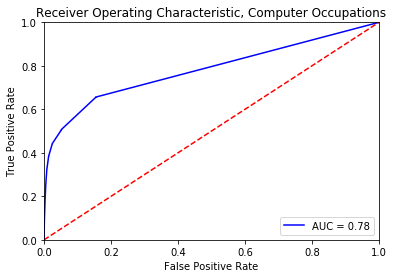

In [38]:
plt.title('Receiver Operating Characteristic, Computer Occupations')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #baseline
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

([array([1.9000e+01, 4.5000e+01, 1.5300e+02, 1.0000e+00, 9.3000e+01,
         3.0700e+02, 2.8800e+02, 2.0000e+00, 6.7800e+02, 2.1636e+04]),
  array([1.9221e+04, 2.4310e+03, 9.4900e+02, 3.0000e+00, 1.8500e+02,
         2.1500e+02, 8.8000e+01, 1.0000e+00, 6.5000e+01, 6.4000e+01])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

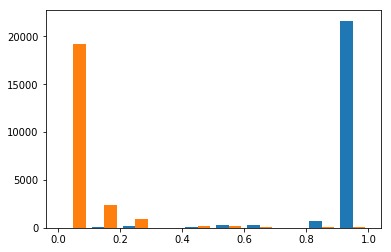

In [39]:
plt.hist(y_pred_proba)

In [42]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
optimal_threshold

0.08333333333333333

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, y_pred)

array([[22295,   108],
       [  616,   203]])

In [45]:
#try again with rf tuned to the same specs as occp 15



# model pipelines
#-----------------------------------
#-------------linear
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42))])

pipe_lr_l2 = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42))])

pipe_sgd = Pipeline([('scl', StandardScaler()),
            ('clf', SGDClassifier(random_state=42))])


#-------------trees
pipe_dt = Pipeline([('clf', DecisionTreeClassifier(random_state=42))])

pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])

pipe_rf_scl = Pipeline([('scl', StandardScaler()),
            ('clf', RandomForestClassifier(random_state=42))])

pipe_gb = Pipeline([('clf', GradientBoostingClassifier(random_state=42))])


#-------------SVM
pipe_svm = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=42))])


#-------------KNN
pipe_knn = Pipeline([('clf', KNeighborsClassifier())])

pipe_knn_scl = Pipeline([('scl', StandardScaler()),
            ('clf', KNeighborsClassifier())])

#-----------------------------------

#-------------XGB
pipe_xgb = Pipeline([('clf', xgb.XGBClassifier())])
#-----------------------------------


# grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]
max_depth = [10,100,1000,10000]
max_depth2 = [10,100,1000]
alpha_range = [.1, .001, .00001, .000001]
gamma_range = [.1, 1, 10]

#-------------linear
grid_params_lr = [{'clf__penalty': ['l1'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear', ],  #,'saga'
        #'clf__multi_class': ['ovr', 'multinomial', 'auto'],
        'clf__class_weight': [None, 'balanced']}] 

grid_params_lr_l2 = [{'clf__penalty': ['l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['newton-cg', 'lbfgs', 'liblinear'],  #, 'sag'
        #'clf__multi_class': ['ovr', 'multinomial', 'auto'],
        'clf__class_weight': [None, 'balanced']}]

grid_params_sgd = [{'clf__loss': ['hinge', 'log', 'perceptron'],
        'clf__alpha': alpha_range,
        'clf__penalty': ['l1', 'l2', 'elasticnet'],
        'clf__class_weight': [None, 'balanced']}] 

#-------------trees
grid_params_dt = [{'clf__criterion': ['gini', 'entropy'],
        'clf__min_samples_leaf': param_range,
        'clf__max_depth': max_depth,
        'clf__min_samples_split': param_range[1:],
        'clf__class_weight': [None, 'balanced']}]

grid_params_rf = [{'clf__criterion': ['entropy'],
    'clf__min_samples_leaf': [1],
    'clf__max_depth': [1000],
    'clf__min_samples_split': [10],
    'clf__class_weight': [None],
    'clf__n_estimators':[10]}]


grid_params_gb = [{}]

# 'clf__loss': ['deviance', 'exponential'],
#         'clf__learning_rate': alpha_range,
#         'clf__n_estimators': max_depth2,
#         'clf__subsample': param_range_fl

#-------------SVM
grid_params_svm = [{'clf__kernel': ['linear', 'rbf', 'poly'],
        'clf__degree': param_range[1:],
        'clf__gamma': gamma_range,
        'clf__C': gamma_range,
        'clf__class_weight': [None, 'balanced']}]

#-------------KNN
grid_params_knn = [{'clf__n_neighbors': param_range}]

#-------------XGB

grid_params_xgb = [{}]

# #'clf__n_estimators': max_depth2,
#                    'clf__max_depth': max_depth,
#                    'clf__learning_rate':gamma_range

#--------------------------------------------------------------

# Construct grid searches
jobs = -1
verbose = 2

#-------------linear
gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose) 

gs_lr_l2 = GridSearchCV(estimator=pipe_lr_l2,
            param_grid=grid_params_lr_l2,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose)

gs_sgd = GridSearchCV(estimator=pipe_sgd,
            param_grid=grid_params_sgd,
            scoring='f1_micro',
            cv=10,
            verbose=verbose)


#-------------trees    
gs_dt = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_dt,
            scoring='f1_micro',
            cv=10, 
            n_jobs=jobs,
            verbose=verbose)

gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='f1_micro',
            cv=10, 
            n_jobs=jobs,
            verbose=verbose)

gs_rf_scl = GridSearchCV(estimator=pipe_rf_scl,
            param_grid=grid_params_rf,
            scoring='f1_micro',
            cv=10, 
            n_jobs=jobs,
            verbose=verbose)

gs_gb = GridSearchCV(estimator=pipe_gb,
            param_grid=grid_params_gb,
            scoring='f1_micro',
            cv=10, 
            verbose=verbose)

#-------------SVM

gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose)

#-------------KNN
gs_knn = GridSearchCV(estimator=pipe_knn,
            param_grid=grid_params_knn,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose)

gs_knn_scl = GridSearchCV(estimator=pipe_knn_scl,
            param_grid=grid_params_knn,
            scoring='f1_micro',
            cv=10,
            n_jobs=jobs,
            verbose=verbose)

#-------------XGB
gs_xgb = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='f1_micro',
            cv=10, 
            verbose=verbose)

#---------------------------------------------------------------------

# List of pipelines for ease of iteration
grids = [ gs_rf]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0:'rf'}

# Fit the grid search objects
print('Performing model optimizations...')
best_f1_micro = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs = gs.fit(X_train, y_train)

    # Best params
    print('Best params: %s' % gs.best_params_)

    # Best training data f1
    print('Best training f1: %.3f' % gs.best_score_)

    # Predict on test data with best params
    y_pred = gs.predict(X_test)

    #accuracy
    print('test accuracy {}:'.format( accuracy_score(y_test, y_pred)))

    # Test data accuracy of model with best params
    print('Test set f1 score for best params: %.3f ' % f1_score(y_test, y_pred))

    # Track best (highest test f1) model
    if f1_score(y_test, y_pred) > best_f1_micro:
        best_f1_micro = f1_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set f1: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
dump_file = 'freewill_untuned_gradboost_occ_15.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

Performing model optimizations...

Estimator: rf
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] clf__class_weight=None, clf__criterion=entropy, clf__max_depth=1000, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=10 
[CV] clf__class_weight=None, clf__criterion=entropy, clf__max_depth=1000, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=10 
[CV] clf__class_weight=None, clf__criterion=entropy, clf__max_depth=1000, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=10 
[CV] clf__class_weight=None, clf__criterion=entropy, clf__max_depth=1000, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=10 
[CV] clf__class_weight=None, clf__criterion=entropy, clf__max_depth=1000, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=10 
[CV] clf__class_weight=None, clf__criterion=entropy, clf__max_depth=1000, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=10 
[C

[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    7.9s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.1s finished


Best params: {'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 10}
Best training f1: 0.971
test accuracy 0.968348979416071:
Test set f1 score for best params: 0.338 

Classifier with best test set f1: rf

Saved rf grid search pipeline to file: freewill_untuned_gradboost_occ_15.pkl


In [46]:
print('test auc {}:'.format( roc_auc_score(y_test, y_pred_proba[:,1], average='micro')))

test auc 0.7809562614722637:
